In [1]:
import tensorflow as tf

In [2]:
TRAIN_DIR = "./cat-dog-dataset/train"
VAL_DIR = "./cat-dog-dataset/validation"
TEST_DIR = "./cat-dog-dataset/test"

IMG_SIZE = (224, 224)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255.,
#                                    rotation_range = 40,
#                                    width_shift_range = 0.2,
#                                    height_shift_range = 0.2,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    brightness_range=[0.2,0.8],
#                                    horizontal_flip = True)


train_datagen = ImageDataGenerator(rescale = 1./255.)
val_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


BATCH_SIZE = 16
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

validation_generator = val_datagen.flow_from_directory(VAL_DIR,
                                                       batch_size = BATCH_SIZE,
                                                       class_mode = 'binary',
                                                       target_size = (224, 224))


test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = 'binary',
                                                  target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                                     weights="imagenet",
                                                     input_shape=(IMG_SIZE[0],
                                                                  IMG_SIZE[1],
                                                                  3))

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    
    # FC 1
    tf.keras.layers.Dense(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    

    tf.keras.layers.Dense(1, activation='sigmoid')
])

for layer in base_model.layers:
    layer.trainable = False

model.summary()

2024-02-25 14:05:49.939498: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-25 14:05:49.939535: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-25 14:05:49.939583: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-25 14:05:49.939877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-25 14:05:49.940072: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                                 
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                        

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                    batch_size=BATCH_SIZE, epochs=20,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator))

Epoch 1/20


2024-02-25 14:06:16.195103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-02-25 14:06:16.217557: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-25 14:06:17.380986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.6673 - accuracy: 0.6150

2024-02-25 14:06:45.367746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-02-25 14:06:45.720846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 45s 281ms/step - loss: 0.6673 - accuracy: 0.6150 - val_loss: 0.6965 - val_accuracy: 0.6244
Epoch 2/20
125/125 [==============================] - 23s 182ms/step - loss: 0.6086 - accuracy: 0.6700 - val_loss: 0.7372 - val_accuracy: 0.6095
Epoch 3/20
125/125 [==============================] - 22s 179ms/step - loss: 0.5761 - accuracy: 0.6910 - val_loss: 0.9810 - val_accuracy: 0.5149
Epoch 4/20
125/125 [==============================] - 22s 176ms/step - loss: 0.5544 - accuracy: 0.7040 - val_loss: 1.3783 - val_accuracy: 0.5000
Epoch 5/20
125/125 [==============================] - 22s 177ms/step - loss: 0.5196 - accuracy: 0.7360 - val_loss: 0.6852 - val_accuracy: 0.5323
Epoch 6/20
125/125 [==============================] - 22s 178ms/step - loss: 0.4909 - accuracy: 0.7605 - val_loss: 0.6936 - val_accuracy: 0.5025
Epoch 7/20
125/125 [==============================] - 22s 180ms/step - loss: 0.4780 - accuracy: 0.7455 - val_loss: 0.6432 - val_accuracy: 0.5

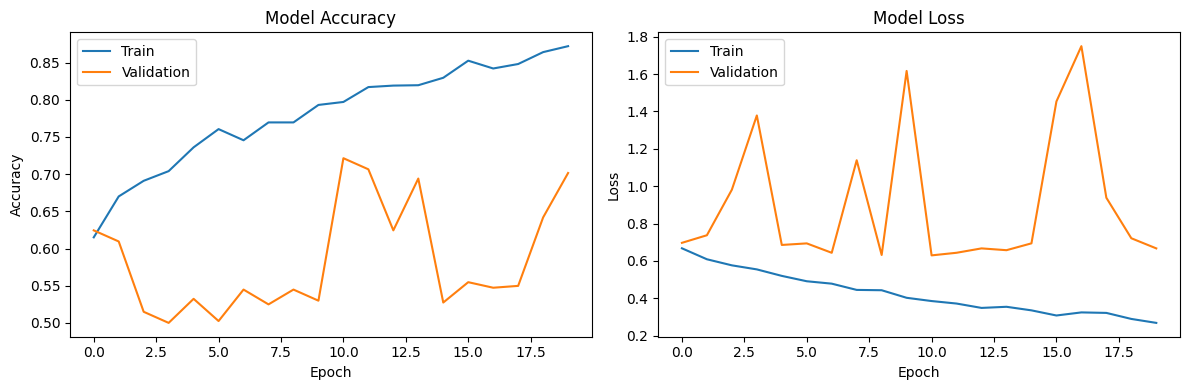

In [8]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()